In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

### Data set:
https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope

In [11]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv("magic_gamma_telescope/magic04.data", names=cols)
df.head()
type(df)

pandas.core.frame.DataFrame

In [3]:
df["class"] = (df["class"] == "g").astype(int)

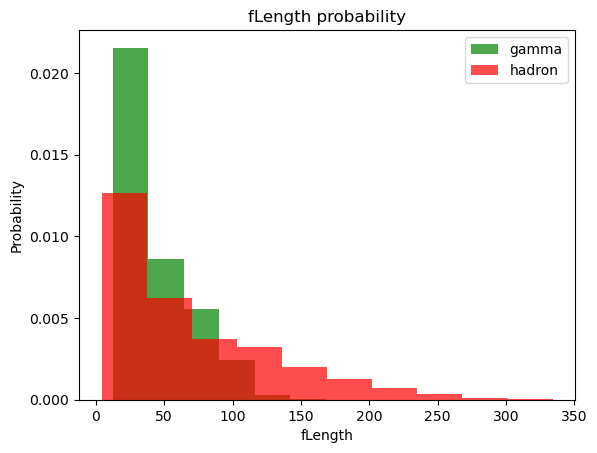

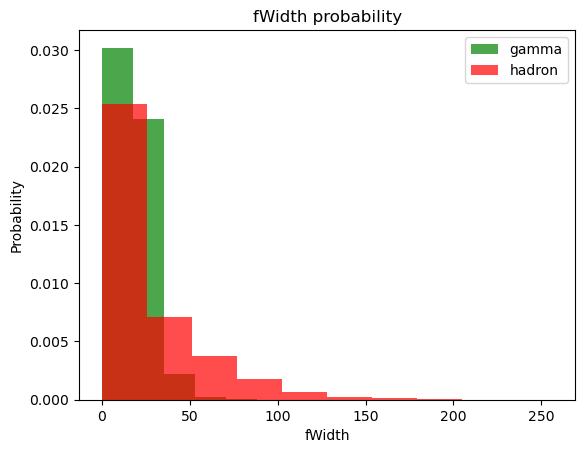

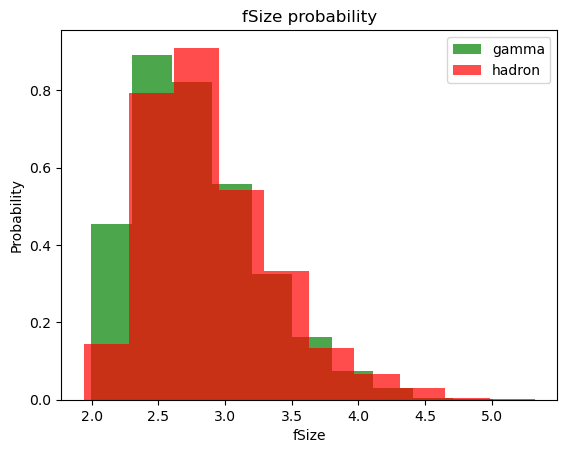

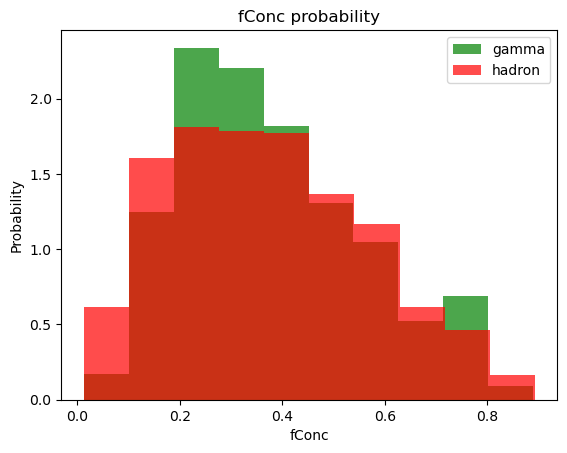

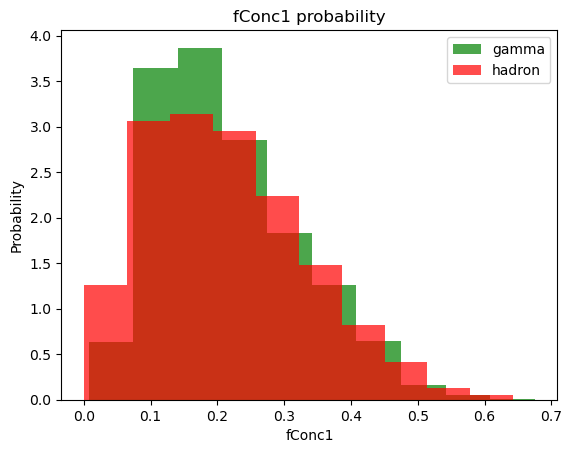

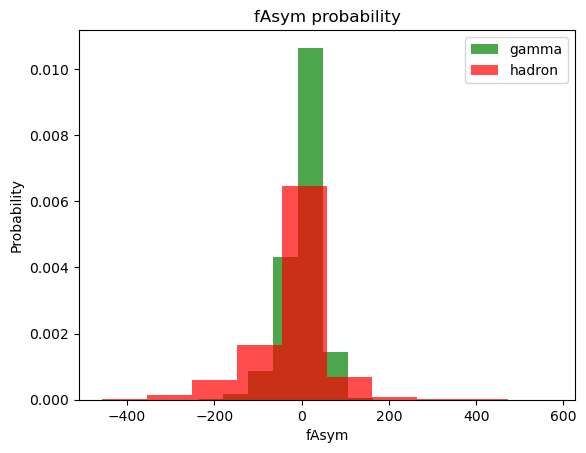

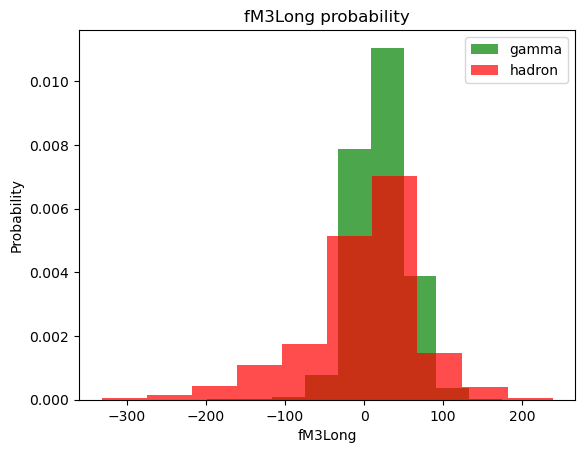

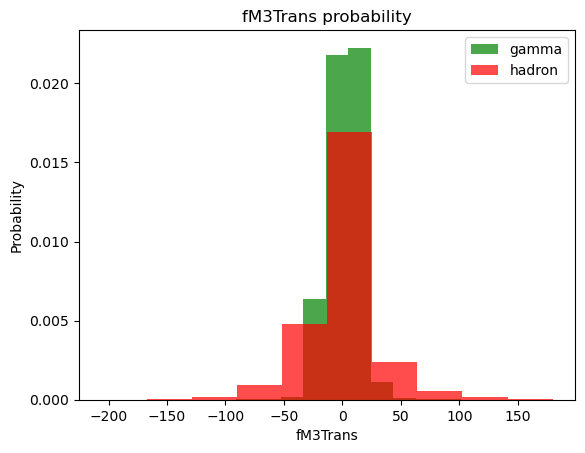

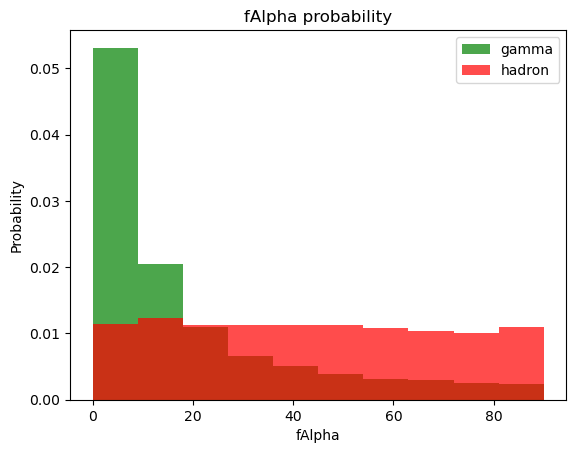

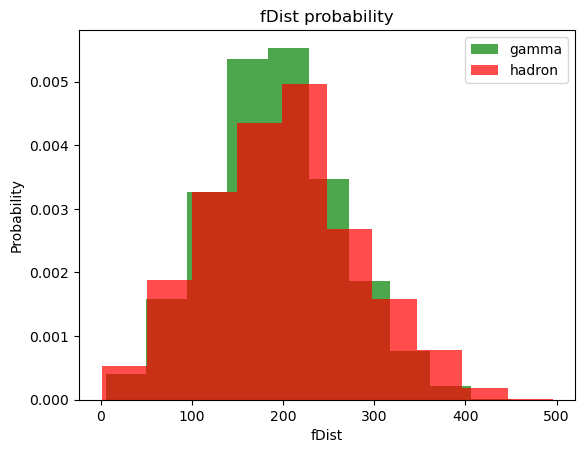

In [4]:
for col in cols[:-1]:
    plt.hist(df[df["class"] == 1][col], color= "green", alpha=0.7, density=True, label= "gamma", bins= 10)
    plt.hist(df[df["class"] == 0][col], color= "red", alpha=0.7, density=True, label= "hadron", bins= 10)
    plt.title(col + " probability")
    plt.ylabel("Probability")
    plt.xlabel(col)
    plt.legend()
    plt.show()

# data splitting

In [20]:
train_split, valid_split, test_split = np.split(df.sample(frac=1), indices_or_sections=[int(0.6 * len(df)), int(0.8 * len(df))])

In [21]:
"""
Normalises the values of the features AFAIK and oversamples if required
"""
def scale_dataset(dataframe: pd.DataFrame, shouldOversample: bool = False):
    X = dataframe[dataframe.columns[:-1]].values # X is caps, by convention in ML, since it is a 2-D matrix and this differentiates it from the 1-D array `y`
    y = dataframe[dataframe.columns[-1]].values

    X = StandardScaler().fit_transform(X)
    
    if shouldOversample:
        X, y = oversample(X, y)
    data = np.hstack([X, np.reshape(y, (-1, 1))])

    return data, X, y

def oversample(X, y):
    return RandomOverSampler().fit_resample(X, y)


In [24]:
train, X_train, y_train = scale_dataset(train_split, shouldOversample = True)
valid, X_valid, y_valid = scale_dataset(valid_split, shouldOversample = False)
test, X_test, y_test = scale_dataset(test_split, shouldOversample = False)
print(train)
print(X_train)

[[2.8255798809079744 2.994921829014778 1.253485265505788 ...
  1.4339251807291489 -0.7082099335973117 'h']
 [2.98333979000259 5.133871751395701 1.5622879617962135 ...
  0.9727950752390682 0.41127037130733823 'h']
 [-0.5824806885091496 -0.257922177409689 0.024016679242048665 ...
  0.6677248277746126 -1.9452005174698563 'g']
 ...
 [-0.7550647306450187 -0.5191827746803749 -0.5944394094718349 ...
  1.3937091673153885 0.2822258326623839 'h']
 [0.9839788804984896 3.777909199264862 2.1103489455017423 ...
  0.8447188917554891 -2.010658376058635 'h']
 [-0.26406887904741994 -0.5671384431765859 -0.37708654748229226 ...
  1.8789597008620769 0.5368557005308491 'h']]
[[ 2.82557988  2.99492183  1.25348527 ...  3.74981351  1.43392518
  -0.70820993]
 [ 2.98333979  5.13387175  1.56228796 ... -2.54293895  0.97279508
   0.41127037]
 [-0.58248069 -0.25792218  0.02401668 ... -0.49944147  0.66772483
  -1.94520052]
 ...
 [-0.75506473 -0.51918277 -0.59443941 ... -0.42992951  1.39370917
   0.28222583]
 [ 0.9839

[[ 0.09152084  0.21634844  0.81034005 ... -0.96573628  1.08426962
   1.        ]
 [-0.69589189 -0.47198817 -1.0787591  ... -0.99815759 -0.1796207
   1.        ]
 [-0.84010368 -0.61363802 -0.91683019 ... -0.32967873 -0.4359401
   0.        ]
 ...
 [-0.69616939 -0.53353192 -0.95951079 ...  2.29455137 -2.07229245
   0.        ]
 [ 1.75810718  0.5189697   0.39146963 ...  0.44522661  1.41551944
   0.        ]
 [-0.69892315 -0.38938214 -0.3295966  ...  0.17060309 -1.42254351
   0.        ]]
